# Install
Require
* Tensorflow 
* TensorFlow Object Detection API

will be installed on fly

# 0. Setup Paths

In [7]:
import os

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
cd drive/MyDrive/WorkingPlateDetector/

/content/drive/MyDrive/WorkingPlateDetector


In [10]:
%ls

Akh.pptx            final.jpg                Project3_Training_Google.ipynb
Augmentation.ipynb  generate_tfrecord_dm.py  Tensorflow/
DetectorTest.ipynb  model.labels.npy


In [11]:
#CUSTOM_MODEL_NAME = '800x800_ssd_mobnet'
CUSTOM_MODEL_NAME = 'TEST_1'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord_dm.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [12]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [13]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME),
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [8]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [9]:
if not "data" in os.listdir("Tensorflow/workspace/images"):
  import zipfile
  with zipfile.ZipFile("../CarPlatesDetector/new_data.zip", 'r') as zip_ref:
      zip_ref.extractall("Tensorflow/workspace/images")

In [14]:
images_path = "Tensorflow/workspace/images/data/Label_image_800/"
xmls_path = "Tensorflow/workspace/images/data/Label_xml_800/"
new_path_train = "Tensorflow/workspace/images/train/"
new_path_test = "Tensorflow/workspace/images/test/"
splitting_images = os.listdir(images_path)

# move to folder train
for i in splitting_images[:4700]:
  cur_xml = i.split(".")[0] + ".xml"
  os.rename(images_path + i,new_path_train + i) ## splitting images before 4700
  os.rename(xmls_path + cur_xml,new_path_train + cur_xml) ## splitting xml before 4700
  
# move to folder test    
for i in splitting_images[4700:]:
  cur_xml = i.split(".")[0] + ".xml"
  os.rename(images_path + i,new_path_test + i) ## splitting images after 4700
  os.rename(xmls_path + cur_xml,new_path_test + cur_xml) ## splitting xml after 4700

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [42]:
# https://www.tensorflow.org/install/source_windows

In [43]:
!pip install wget
import wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=e1e90f1139d513e6194bffc7a9450d0d66f10756488a53977129840b7d68369f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [44]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

# This you should run only once 

In [45]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 27.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [48]:
# Install Tensorflow Object Detection 
if os.name=='posix': 
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/drive/MyDrive/WorkingPlateDetector/Tensorflow/models/research
  Preparing metadata (setup.py) ... done
  Using cached avro-python3-1.10.2.tar.gz (38 kB)
  Preparing metadata (setup.py) ... done
  Using cached apache_beam-2.41.0-cp37-cp37m-manylinux2010_x86_64.whl (10.9 MB)
  Using cached tf_slim-1.1.0-py2.py3-none-any.whl (352 kB)
  Using cached lvis-0.5.3-py3-none-any.whl (14 kB)
  Using cached tf_models_official-2.10.0-py2.py3-none-any.whl (2.2 MB)
  Using cached tensorflow_io-0.27.0-cp37-cp37m-manylinux_2_12_x

In [0]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}
#print(VERIFICATION_SCRIPT)

Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-09-09 14:39:43.135715: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0909 14:39:43.463507 139963264354176 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.58s
I0909 14:39:43.715074 139963264354176 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.58s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.5s
I0909 14:39:44.218521 139963264354176 test_

In [0]:
import tensorflow as tf
import tensorflow_hub as hub
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.__version__

'2.7.0'

In [0]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2022-09-09 14:40:17--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.24.128, 2404:6800:4003:c03::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.24.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  77.1MB/s    in 0.3s    

2022-09-09 14:40:18 (77.1 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/

In [0]:
!cd {paths['SCRIPTS_PATH']} && wget https://gist.githubusercontent.com/arm2arm/fe8fa9b1b9f6f716f914c0d62922bfa9/raw/eecbeae5c64612c7e0bf0f82541aa770b6d7b624/generate_tfrecord_dm.py 

--2022-09-09 14:40:20--  https://gist.githubusercontent.com/arm2arm/fe8fa9b1b9f6f716f914c0d62922bfa9/raw/eecbeae5c64612c7e0bf0f82541aa770b6d7b624/generate_tfrecord_dm.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6286 (6.1K) [text/plain]
Saving to: ‘generate_tfrecord_dm.py.2’

generate_tfrecord_d 100%[===================>]   6.14K  --.-KB/s    in 0.001s  

2022-09-09 14:40:21 (7.19 MB/s) - ‘generate_tfrecord_dm.py.2’ saved [6286/6286]



# 2. Create Label Map

In [0]:
labels = [{'name':'plate', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [0]:
print(files['LABELMAP'])

Tensorflow/workspace/annotations/label_map.pbtxt


# 3. Create TF records

In [0]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')}
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')}

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 4. Copy Model Config to Training Folder

In [0]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [0]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [0]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [0]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [0]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                     
    proto_str = f.read()                                                                                                                                                         
    text_format.Merge(proto_str, pipeline_config)

In [0]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 8
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [0]:
config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:
    f.write(config_text)

In [0]:
pipeline_config

model {
  ssd {
    num_classes: 1
    image_resizer {
      fixed_shape_resizer {
        height: 320
        width: 320
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v2_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 3.9999998989515007e-05
          }
        }
        initializer {
          random_normal_initializer {
            mean: 0.0
            stddev: 0.009999999776482582
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      use_depthwise: true
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
        additional_layer_depth: 128
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
 

# 6. Train the model

In [0]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [0]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [0]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/TEST_1 --pipeline_config_path=Tensorflow/workspace/models/TEST_1/pipeline.config --num_train_steps=10000


In [0]:
!{command}

2022-09-09 15:00:27.503838: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0909 15:00:27.507633 139933536548736 mirrored_strategy.py:376] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 10000
I0909 15:00:27.513331 139933536548736 config_util.py:552] Maybe overwriting train_steps: 10000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0909 15:00:27.513514 139933536548736 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0909 15:00:27.538770 139933536548736 deprecation.py:347] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experime

# 7. Evaluate the Model

In [0]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [0]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/TEST_1 --pipeline_config_path=Tensorflow/workspace/models/TEST_1/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/TEST_1


In [0]:
!{command}

W0906 19:42:56.189738 139792008927104 model_lib_v2.py:1090] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0906 19:42:56.189975 139792008927104 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0906 19:42:56.190063 139792008927104 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0906 19:42:56.190149 139792008927104 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0906 19:42:56.190279 139792008927104 model_lib_v2.py:1110] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2022-09-06 19:42:56.990349: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original confi

In [0]:
files['LABELMAP']

'Tensorflow/workspace/annotations/label_map.pbtxt'

# 8. Load Train Model From Checkpoint

In [0]:
!pip install --upgrade object_detection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util # read labelmaps 
from object_detection.utils import visualization_utils as viz_utils # draw rectangle
from object_detection.builders import model_builder 
from object_detection.utils import config_util # read configs files

In [85]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [86]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [87]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [88]:
category_index

{1: {'id': 1, 'name': 'plate'}}

In [89]:
IMAGE_PATH = new_path_test + 'car_00017.jpg' # No lic Track

car="car_01640.jpg"
#car="car_02402.jpg"
car="car_00003.jpg"
#IMAGE_PATH = f'../DATA/2022-08-11-160214/data/result_images/{car}'
#IMAGE_PATH =os.path.join(paths['IMAGE_PATH'],"test/Cars411.png")
print(IMAGE_PATH)

Tensorflow/workspace/images/test/car_00017.jpg


In [90]:
tf.config.run_functions_eagerly(True)

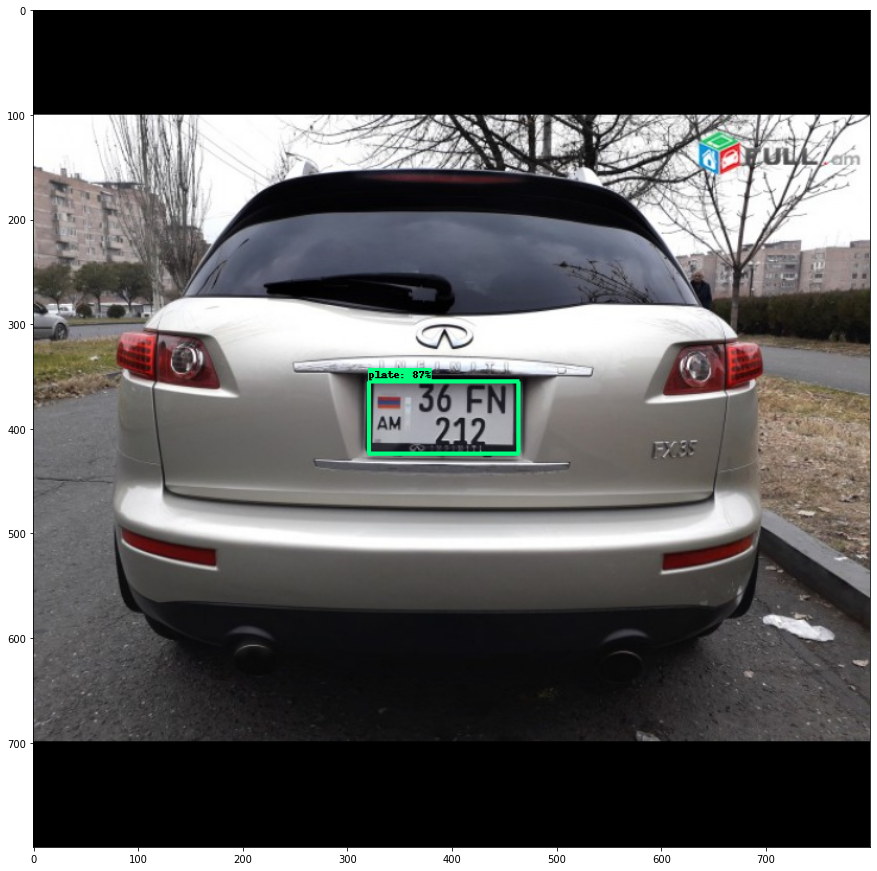

In [91]:

    img = cv2.imread(IMAGE_PATH)
    image_np = np.array(img)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.1,
                agnostic_mode=False)

    plt.figure(figsize=(15,30))
    plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
    plt.show()


In [92]:
detections['detection_classes']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
detections.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices', 'num_detections'])

In [0]:
import tensorflow as tf
import numpy as np
save_dir = os.path.join(paths['TFLITE_PATH'],'saved_model')
converter = tf.lite.TFLiteConverter.from_saved_model(save_dir)
tflite_model = converter.convert()
with open(save_dir+'model.tflite', 'wb') as f:
    f.write(tflite_model)
np.save('model.labels.npy', "plate")

In [0]:
output_directory = paths['TFLITE_PATH']
model_dir = os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME)

!python Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py \
    --trained_checkpoint_dir {model_dir} \
    --output_directory {output_directory} \
    --pipeline_config_path {files['PIPELINE_CONFIG']}

In [0]:
os.path.join(paths['TFLITE_PATH'],'saved_model')

'Tensorflow/workspace/models/TEST_1/tfliteexport/saved_model'

In [0]:
save_dir = os.path.join(paths['TFLITE_PATH'],'saved_model')
tflite_dir = os.path.join(paths['TFLITE_PATH'],'tf_lite','model.tflite')
!tflite_convert --saved_model_dir={save_dir} --output_file={tflite_dir}

2022-09-30 14:53:44.312078: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-09-30 14:53:55.078476: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2022-09-30 14:53:55.078540: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2022-09-30 14:53:55.078559: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:372] Ignored change_concat_input_ranges.
Estimated count of arithmetic ops: 1.698 G  ops, equivalently 0.849 G  MACs


In [0]:
import tensorflow as tf
import numpy as np
converter = tf.lite.TFLiteConverter.from_saved_model(os.path.join(paths['TFLITE_PATH'],'saved_model'))
tflite_model = converter.convert()
with open(os.path.join(paths['TFLITE_PATH'],'saved_model', 'model.tflite'), 'wb') as f:
    f.write(tflite_model)
np.save(os.path.join(paths['TFLITE_PATH'],'saved_model','model.labels.npy'), np.unique("plate")) # save

In [15]:
files['tflite'] = os.path.join(paths['TFLITE_PATH'],'saved_model', 'model.tflite')
files['npy'] = os.path.join(paths['TFLITE_PATH'],'saved_model', 'model.labels.npy')

In [5]:
import os

In [125]:
interpreter = tf.lite.Interpreter(model_path=files['tflite'])
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
_, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

# Load models
label_decoder= np.load(files['npy'],allow_pickle=True) # 
print(label_decoder)

['plate']


In [126]:
from PIL import Image
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [127]:
index = 1
image = np.array(Image.open(glob.glob(new_path_test+'*.jpg')[0]))
img = cv2.resize(image,(320,320))
input_tensor= np.array(np.expand_dims(img,0), dtype=np.float32)
input_index = interpreter.get_input_details()[0]["index"]
interpreter.set_tensor(input_index, input_tensor)
interpreter.invoke()
output_details1 = interpreter.get_output_details()[0]
output_details2 = interpreter.get_output_details()[1]
output_details3 = interpreter.get_output_details()[3]
tensor1 = np.squeeze(interpreter.get_tensor(output_details1['index']))
tensor2 = np.squeeze(interpreter.get_tensor(output_details2['index']))
tensor3 = np.squeeze(interpreter.get_tensor(output_details3['index']))

In [128]:
tensor3 = np.array(tensor3, dtype=np.int32)

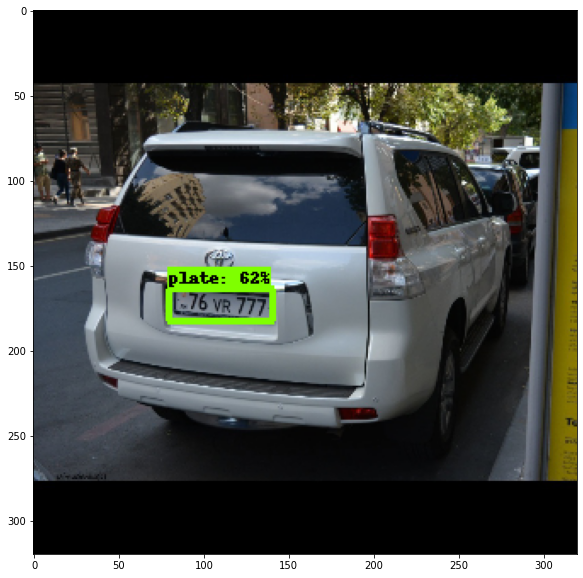

In [132]:
plt.figure(figsize=(10,10))
d = viz_utils.visualize_boxes_and_labels_on_image_array(
            img,
            tensor2,
            tensor3+1,
            tensor1,
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.5,
            agnostic_mode=False)
plt.imshow(img)

In [55]:
tensor[:,0] * input_width 

array([ 164.87123 ,  157.99756 ,  -38.39608 ,  161.51549 , -129.40558 ,
        160.8692  ,  145.53178 , -206.6919  ,  -71.52978 ,  -22.506733],
      dtype=float32)

In [17]:
tens_num = 5
print(interpreter.get_tensor(tens_num), len(interpreter.get_tensor(tens_num)))
print(interpreter.get_tensor(339), len(interpreter.get_tensor(339)[0]))

[  1  20  20 128] 4
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 10


In [0]:
for i in range(10):
  print(interpreter.get_tensor(i))